In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [2]:
X=df[['company','job','degree']] 
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [3]:
y = df.salary_more_then_100k
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le_encoded = LabelEncoder() #creating an object from class

In [6]:
type(X['company'])

pandas.core.series.Series

In [7]:
#fit transform takes pandas series(assigns numbers to text of columns in alphabetical order)
X['company_n'] = le_encoded.fit_transform(X['company']) 
X['job_n'] = le_encoded.fit_transform(X['job']) 
X['degree_n'] = le_encoded.fit_transform(X['degree']) 

In [8]:
X

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [9]:
X.drop(['company','job','degree'],axis = 'columns',inplace = True)
X

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


__Decision tree model__

In [10]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [11]:
model.fit(X,y)

DecisionTreeClassifier()

In [12]:
model.score(X,y)

1.0

__Logistic Regression__

In [13]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X,y)

LogisticRegression()

In [14]:
LRmodel.score(X,y)

0.75

In [15]:
LRpred= LRmodel.predict(X)
LRpred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

__Manual Calculations__

In [16]:
LRmodel.coef_ # 3 variables 3 slopes

array([[ 0.30301653, -0.73911616,  0.58776478]])

In [17]:
LRmodel.intercept_ # binary class so 1 intercept

array([0.62625057])

In [18]:
X_train= X.to_numpy() #converting dataframe to numpy for manual calculations
X_train

array([[2, 2, 0],
       [2, 2, 1],
       [2, 0, 0],
       [2, 0, 1],
       [2, 1, 0],
       [2, 1, 1],
       [0, 2, 1],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 2, 0],
       [1, 2, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [19]:
def prediction_function(x1,x2,x3,m1,m2,m3,clas):
    y = x1*m1 + x2*m2 + x3*m3 + LRmodel.intercept_[clas]
    return y

In [20]:
def sigmoid(y):
    import math
    return 1/(1 + math.exp(-y))

In [21]:
row_no= 0

In [22]:
def find_x(row_no): # Function for assigning independant variables as per the row from X_test
    x1 = X_train[row_no][0]
    x2 =  X_train[row_no][1]
    x3 =  X_train[row_no][2]
    return x1,x2,x3

In [23]:
x1,x2,x3 = find_x(row_no) #using the function above
x1,x2,x3

(2, 2, 0)

In [24]:
y0=prediction_function(x1,x2,x3, 0.30301653, -0.73911616,  0.58776478,0)
y0

-0.24594869198474145

In [25]:
sigmoid(y0) # Returns the prob of prediction 1. watch the values matches with the predict_proba values below

0.4388209139771735

In [26]:
# the output from sigmoid are converted to binary output
if (sigmoid(y0)> 0.5):
    print(1) 
else: 
    print (0)

0


In [27]:
0.56117909 + 0.43882091 # adding first row probabilities from next cell

1.0

In [28]:
LRmodel.predict_proba(X) # [[prob of 0, prob of 1]]

array([[0.56117909, 0.43882091],
       [0.41536839, 0.58463161],
       [0.22578199, 0.77421801],
       [0.13942806, 0.86057194],
       [0.37914768, 0.62085232],
       [0.25332964, 0.74667036],
       [0.56567263, 0.43432737],
       [0.52818648, 0.47181352],
       [0.3483612 , 0.6516388 ],
       [0.22899135, 0.77100865],
       [0.63389548, 0.36610452],
       [0.49030133, 0.50969867],
       [0.28307343, 0.71692657],
       [0.17989901, 0.82010099],
       [0.45260499, 0.54739501],
       [0.31476927, 0.68523073]])

In [29]:
LRpred = LRmodel.predict(X) #compare with predict_proba above. How it is derived ? refer cells below.
LRpred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
np.argmax(LRmodel.predict_proba(X),axis =1) 

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
np.sum(LRmodel.predict_proba(X),axis =1) 
# observe the addition of two prob in above array returns 1 for each of the rows. Softmax returns the same results. 
# As the classes are binary addition of two probabilities is 1 . If more than 3 classes addition may or may not be 1.

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,LRpred)

Text(24.0, 0.5, 'True')

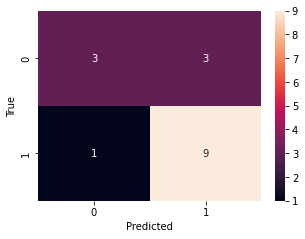

In [33]:
import seaborn as sn
plt.figure (figsize =(5,3.5))
sn.heatmap(cm, annot = True,fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("True")